In [1]:
# Load Pakages
library("dplyr")
library("rcompanion")
library("car")

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'rcompanion' was built under R version 4.1.3"
Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.1.3"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode




In [4]:
# Load Data
NEWgoogleplaystore <- read.csv("NEWgoogleplaystore.csv")

### Is there a difference in price among the three app categories of beauty, food and drink, and photography? 

In [5]:
# Data Wrangling - Filter the data and remove missing values
apps <- na.omit(NEWgoogleplaystore %>% filter(Category %in% c("BEAUTY", "FOOD_AND_DRINK", "PHOTOGRAPHY")))

In [6]:
# Make price numeric
apps$Price <- as.numeric(apps$Price)

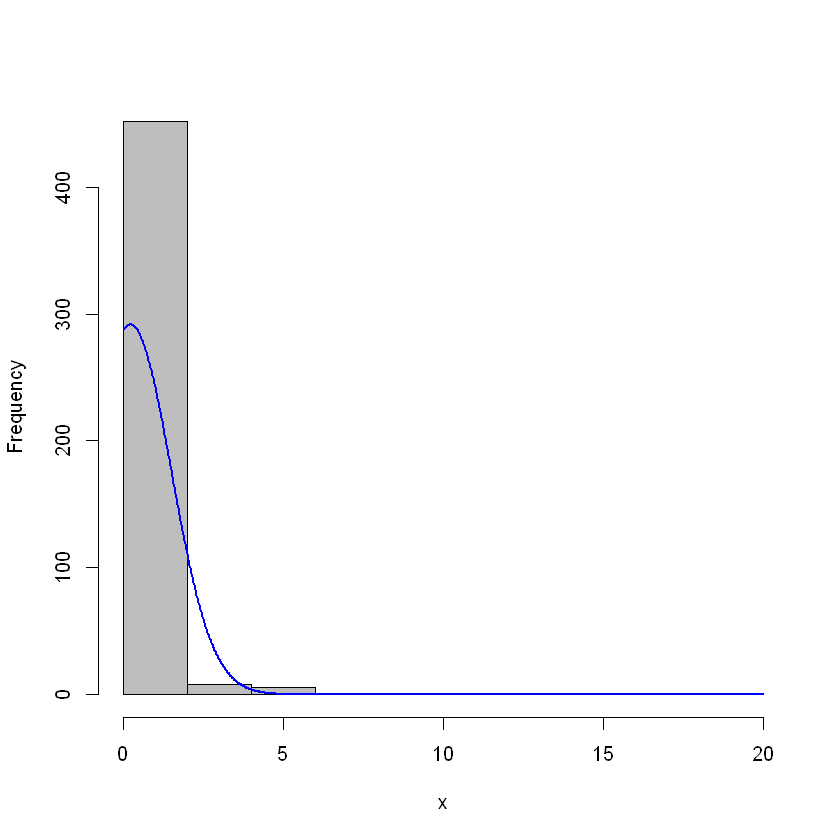

In [7]:
# Test assumptions - Normality
plotNormalHistogram(apps$Price)

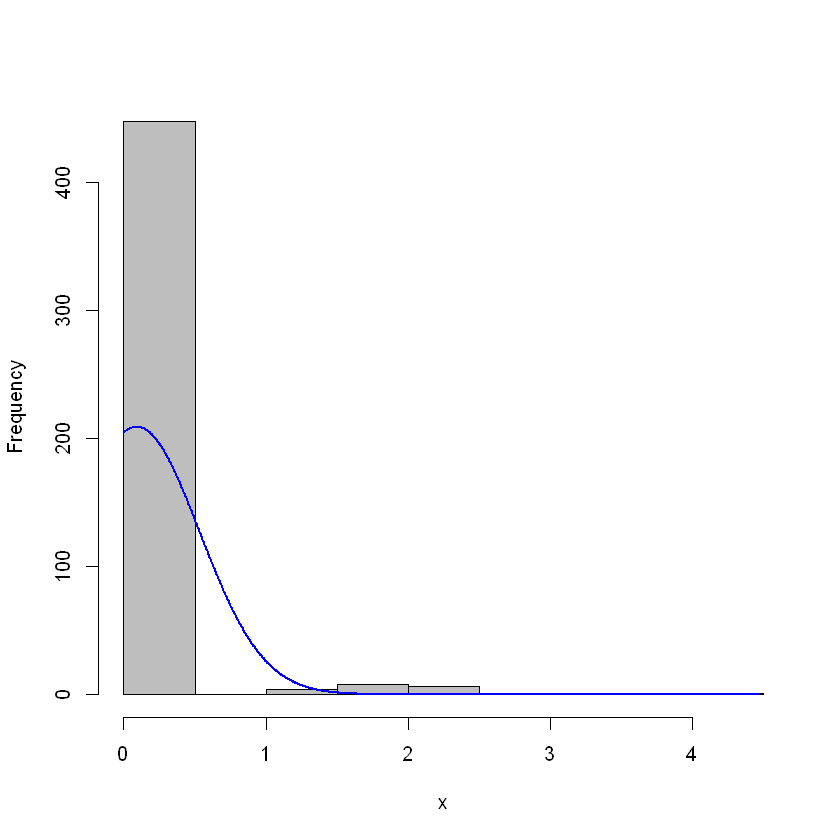

In [8]:
# Transform because it lacks normality
apps$PriceSQRT <- sqrt(apps$Price)
plotNormalHistogram(apps$PriceSQRT)

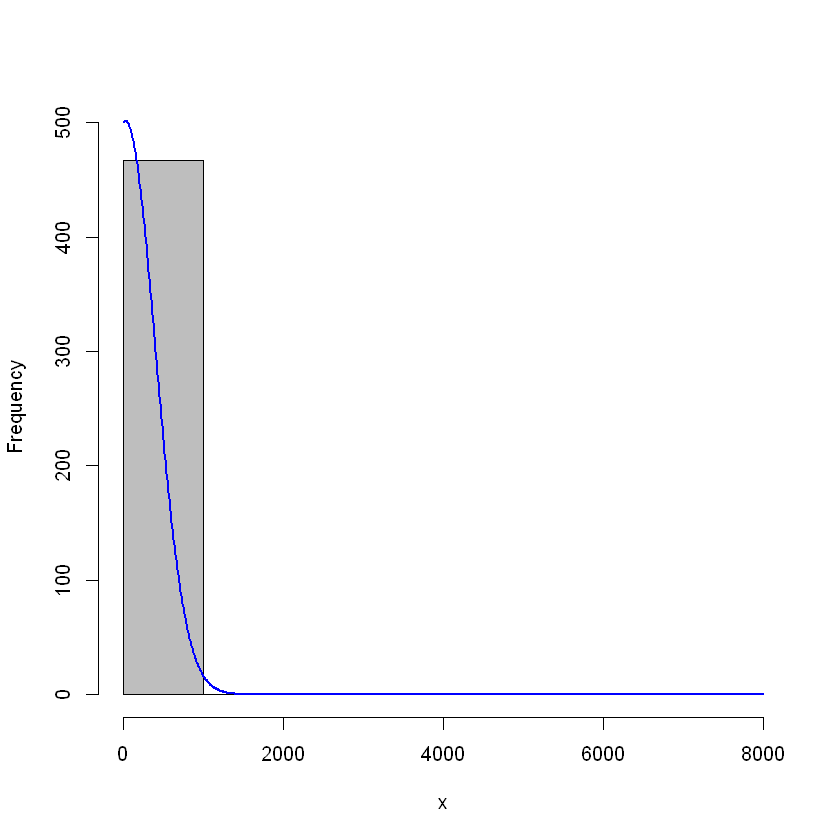

In [9]:
# No improvement - try cubing it
apps$PriceCUBE <- apps$Price ^ 3
plotNormalHistogram(apps$PriceCUBE)

### No luck on fixing the normality to remain with the origin data. ANOVAs are somewhat tolerant of a lack of normality

In [10]:
# Homogeneity of Variance
# Bartlett's Test
bartlett.test(Price ~ Category, data=apps)


	Bartlett test of homogeneity of variances

data:  Price by Category
Bartlett's K-squared = Inf, df = 2, p-value < 2.2e-16


In [11]:
# p value < .05 which violates the assumption of homogeneity of variance

In [12]:
fligner.test(Price ~ Category, data=apps)


	Fligner-Killeen test of homogeneity of variances

data:  Price by Category
Fligner-Killeen:med chi-squared = 4.878, df = 2, p-value = 0.08725


In [13]:
# Also violates the assumption of homogeneity of variance

### Correcting for Violations of Homogeneity of Variance
There are two ways that you can correct for a violation of homogeneity of variance. The first is the BoxCox transformation of your data, and the second is running a slightly different type of ANOVA, one that was created specifically to handle this violation. That test is called the Welch One-Way Test, and you'll learn about this ANOVA option.

### Sample Size
An ANOVA requires a sample size of at least 20 per independent variable. In this case, you only have one independent variable, so as long as you have at least 20 cases, you are fine. Looking at the data, the n is 515, so you are fine to proceed with this assumption!

### Independence
There is no statistical test for the assumption of independence.

# Compute ANOVA with Met Assumptions ( Equal Variance)

In [16]:
appsANOVA <- aov(apps$Price ~ apps$Category)

In [17]:
summary(appsANOVA)

               Df Sum Sq Mean Sq F value Pr(>F)
apps$Category   2    5.2   2.617   1.601  0.203
Residuals     465  760.2   1.635               

## Compute ANOVA with violated assumptions (Unequal Variance)

In [18]:
# Linear Model
ANOVA <- lm(Price ~ Category, data=apps)
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Category,2,6.314192,0.001969503
Residuals,465,NA,NA


In [21]:
# Computing Post Hocs with No Adjustment
pairwise.t.test(apps$Price, apps$Category, p.adjust="none")
# No significant differences


	Pairwise comparisons using t tests with pooled SD 

data:  apps$Price and apps$Category 

               BEAUTY FOOD_AND_DRINK
FOOD_AND_DRINK 0.74   -             
PHOTOGRAPHY    0.19   0.16          

P value adjustment method: none 

In [22]:
# Computing Post Hocs with Bonferroni Adjustments
pairwise.t.test(apps$Price, apps$Category, p.adjust="bonferroni")
# Even less significant results


	Pairwise comparisons using t tests with pooled SD 

data:  apps$Price and apps$Category 

               BEAUTY FOOD_AND_DRINK
FOOD_AND_DRINK 1.00   -             
PHOTOGRAPHY    0.56   0.48          

P value adjustment method: bonferroni 

In [23]:
# Computing Post Hocs when you have violated the assumption of homogeneity of variance
pairwise.t.test(apps$Price, apps$Category, p.adjust="bonferroni", pool.sd = FALSE)



	Pairwise comparisons using t tests with non-pooled SD 

data:  apps$Price and apps$Category 

               BEAUTY FOOD_AND_DRINK
FOOD_AND_DRINK 0.4943 -             
PHOTOGRAPHY    0.0035 0.1470        

P value adjustment method: bonferroni 

In [26]:
# Determine Means and Draw Conclusions
appsMeans <- apps %>% group_by(Category) %>% summarize(Mean = mean(Price))
print(appsMeans)

# A tibble: 3 x 2
  Category         Mean
  <chr>           <dbl>
1 BEAUTY         0     
2 FOOD_AND_DRINK 0.0778
3 PHOTOGRAPHY    0.278 
